# Analyze HuBERT Data

In [236]:
# Utilitiies
import numpy as np
import matplotlib.pyplot as plt
import glob 
import os

In [237]:
SEGMENTS = ["aa", "iy"]

In [238]:
hidden_representations = []
save_folder = "./data"

for segment in SEGMENTS:
    save_path = os.path.join(save_folder, f"HS_{segment}.npy")
    hidden_representations.append(
        np.load(save_path)
    )

In [239]:
# print(hidden_representations[0].shape)
# print(hidden_representations[1].shape)

In [240]:
# Resample same ammount
for segment_idx in range(len(SEGMENTS)):

    # TODO understand how the np.random.choice works, TODO check replace = false
    hidden_representations[segment_idx] = hidden_representations[segment_idx][:, :, np.random.choice(
        hidden_representations[segment_idx].shape[2],
        min(hidden_representations[0].shape[2], hidden_representations[1].shape[2]), replace=False)]

Goal: Create a graph where y index represents distinguishability through x (each encoder) to prove "better and better" representations

Note: at each layer we have 500, 1024 vectors for 2 segments
how do we compare them?

- average across the 500 frames at the layer  --> note we don't get the context of the values as well

In [241]:
def cohensd(x, y):
    mnx = np.mean(x)
    mny = np. mean(y)
    sdx = np.std(x)
    sdy = np.std(y)
    return ((mnx-mny) / np.sqrt((((sdx**2)+(sdy**2))/2)))

In [242]:
# num_encoders = 25
# num_frames = 500
# vector_len = 1024
# effect_sizes = np.empty((num_encoders, vector_len))
# for encoder_idx in range(num_encoders):
#     # for frame in range(num_frames):
#     #     for vector in

#     for vector_component in range(vector_len):
#         effect_sizes[encoder_idx, vector_component] = cohensd(hidden_representations[0][encoder_idx, vector_component, :],
#                                                               hidden_representations[1][encoder_idx, vector_component, :])

In [243]:
# # See how many hidden representations's vector component is "distinctive"
# num_distinctive = np.abs(effect_sizes) > 0.5
# # TODO document this
# print(effect_sizes.shape)
# print(np.prod(effect_sizes.shape))
# print(100*np.sum(num_distinctive)/np.prod(effect_sizes.shape))

In [244]:
# # axis = 1 means over rows
# distinctiveness_by_encoder = np.sum(num_distinctive, axis=1)

# plt.plot(distinctiveness_by_encoder, "-o")

Text(0.5, 0, 'Encoder')

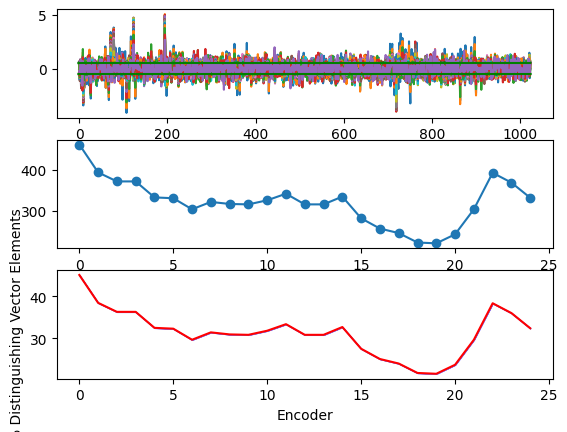

In [245]:
num_encoders = 25
num_frames = 500
vector_len = 1024
num_trials = 

distinction_all = np.zeros((num_trials, num_encoders))

for trial in range(num_trials):
    hidden_representations = []
    save_folder = "./data"

    for segment in SEGMENTS:
        save_path = os.path.join(save_folder, f"HS_{segment}.npy")
        hidden_representations.append(
            np.load(save_path)
        )

    # Resample same ammount
    for segment_idx in range(len(SEGMENTS)):

        # TODO understand how the np.random.choice works, TODO check replace = false
        hidden_representations[segment_idx] = hidden_representations[segment_idx][:, :, np.random.choice(
            hidden_representations[segment_idx].shape[2],
            # min(hidden_representations[0].shape[2], hidden_representations[1].shape[2],)
            100
            , replace=False)]

    effect_sizes = np.empty((num_encoders, vector_len))
    for encoder_idx in range(num_encoders):
        # for frame in range(num_frames):
        #     for vector in

        for vector_component in range(vector_len):
            effect_sizes[encoder_idx, vector_component] = cohensd(hidden_representations[0][encoder_idx, vector_component, :],
                                                                  hidden_representations[1][encoder_idx, vector_component, :])
    
    distinctive_elements = []
    for encoder_idx in range(num_encoders):
        distinctive_elements.append(np.argwhere(np.abs(effect_sizes[encoder_idx, :]) > 0.5))
        plt.subplot(3, 1, 1)
        # plt.plot([np.abs(effect_size) > 0.5 for effect_size in effect_sizes[encoder_idx, :]])
        # plt.plot(effect_sizes[encoder_idx, :])
        plt.plot(effect_sizes[encoder_idx, :])
        plt.plot([0, vector_len-1], [-0.5, -0.5], 'g')
        plt.plot([0, vector_len-1], [0.5, 0.5], 'g')

    # See how many hidden representations's vector component is "distinctive"
    num_distinctive = np.abs(effect_sizes) > 0.5

    # TODO document this
    # print(effect_sizes.shape)
    # print(np.prod(effect_sizes.shape))
    # print(100*np.sum(num_distinctive)/np.prod(effect_sizes.shape))

    # axis = 1 means over rows
    distinctiveness_by_encoder = np.sum(num_distinctive, axis=1)
    distinction_all[trial, :] = 100 * distinctiveness_by_encoder / 1024

    plt.subplot(3, 1, 2)
    plt.plot(distinctiveness_by_encoder, "-o")

mean_of_distinctivness = np.mean(distinction_all, axis=0)
std_of_distinctivness = np.std(distinction_all, axis=0)

plt.subplot(3, 1, 3)
plt.plot(np.arange(num_encoders), mean_of_distinctivness, 'r')
plt.fill_between(np.arange(num_encoders),
                 mean_of_distinctivness-(std_of_distinctivness/2),
                 mean_of_distinctivness+(std_of_distinctivness/2),
                 color='b',
                 alpha=0.5)  # alpha sets the transparency

plt.ylabel("% Distinguishing Vector Elements")
plt.xlabel("Encoder")